##### Testing code with snippet from the web

(array([-1.82842712, -1.63336319, -1.43829925, -1.24323531, -1.04817137,
        -0.85310743, -0.65804349, -0.46297955, -0.26791561, -0.07285167,
         0.12221227,  0.31727621,  0.51234015,  0.70740409,  0.90246803,
         1.09753197,  1.29259591,  1.48765985,  1.68272379,  1.87778773,
         2.07285167,  2.26791561,  2.46297955,  2.65804349,  2.85310743,
         3.04817137,  3.24323531,  3.43829925,  3.63336319,  3.82842712]),
 array([3.99524376e+00, 3.46254459e+00, 2.96789536e+00, 2.51129608e+00,
        2.09274673e+00, 1.71224732e+00, 1.36979786e+00, 1.06539834e+00,
        7.99048751e-01, 5.70749108e-01, 3.80499405e-01, 2.28299643e-01,
        1.14149822e-01, 3.80499405e-02, 1.49862761e-14, 0.00000000e+00,
        3.80499405e-02, 1.14149822e-01, 2.28299643e-01, 3.80499405e-01,
        5.70749108e-01, 7.99048751e-01, 1.06539834e+00, 1.36979786e+00,
        1.71224732e+00, 2.09274673e+00, 2.51129608e+00, 2.96789536e+00,
        3.46254459e+00, 3.99524376e+00]))

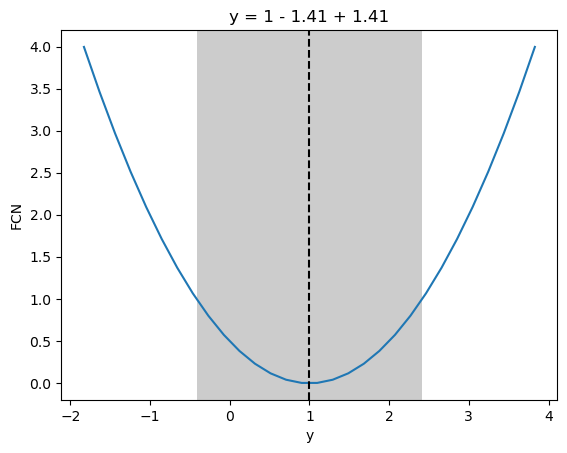

In [31]:
from iminuit import Minuit


def cost(x, y, z):
    return (x - 1) ** 2 + (y - x) ** 2 + (z - 2) ** 2


cost.errordef = Minuit.LEAST_SQUARES

m = Minuit(cost, x=0, y=0, z=0)
m.migrad()
m.draw_mnprofile("y")

In [21]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import norm

x = norm.rvs(size=1000, random_state=1)

def pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Negative unbinned log-likelihood, you can write your own
cost = UnbinnedNLL(x, pdf)
print(type(cost))
m = Minuit(cost, mu=0, sigma=1)
#print(type(mu))
#print(type(sigma))

m.limits["sigma"] = (0, np.inf)
m.migrad()  # find minimum
m.hesse()   # compute uncertainties

<class 'iminuit.cost.UnbinnedNLL'>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2800                       │              Nfcn = 34               │
│ EDM = 2.01e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   0.039   │   0.031   │            │            │         │         │       │
│ 1 │ sigma │   0.981   │   0.022   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 0.000962 8.01e-08 │
│ sigma │ 8.01e-08 0.000481 │
└───────┴───────────────────┘

# Exercise for Week 7

In [2]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from iminuit.cost import BinnedNLL
from scipy.stats import norm
from iminuit.cost import LeastSquares

In [3]:
DIR = os.path.abspath(os.curdir)

In [4]:
data = np.loadtxt(DIR + "/datafile-exp.txt")
tau = np.array([2.2]).astype(float)
#tau = float(2.2)

```
data = []
with open(DIR + '/Week 7/datafile-exp.txt', 'r') as file:
    for line in file.readlines():
        data.append(float(line.rsplit()[0]))
```

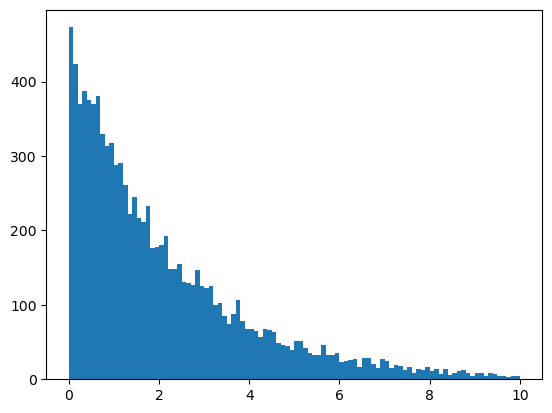

In [5]:
plt.hist(data, bins=100)
plt.show()

```
class exp_calc:
    def __init__(self, data, lifet): #loLim, highLim
        #self.loLim = loLim
        #self.highLim = highLim
        self.lifet = lifet
        self.data = data
    
    def exp_norm_factor(tau, t_low, t_high):
        norm = np.exp(-(t_low/tau))-np.exp(-(t_high/tau))
```
    
        
       

In [20]:
def exp_pdf(t, tau):
    return ((1./tau)*np.exp(-(t/tau)))

def Nll(tau):
    nll = 0
    for i in data:
        nll += np.log(exp_pdf(i, tau))
        
    return -np.array(nll)

# Negative binned log-likelihood, you can write your own
#nllc = exp_calc(data, tau)
print(type(Nll))

startvals = {
    'tau': 1.
}

m = Minuit(Nll, **startvals) #, name=("tau",)
print(m)

#m.limits["sigma"] = (0, np.inf)
m.migrad()  # find minimum
m.hesse()

<class 'function'>
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   1.00    │   0.01    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.732e+04                  │              Nfcn = 33               │
│ EDM = 2.13e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   2.079   │   0.029   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────┐
│     │      tau │
├─────┼──────────┤
│ tau │ 0.000864 │
└─────┴──────────┘